In [1]:
"""
dn= dimansion of society
t_rec= time of Recovery
TS= the time pass by each step
d_p= days passed
"""

'\ndn= dimansion of society\nt_rec= time of Recovery\nTS= the time pass by each step\nd_p= days passed\n'

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import scipy.integrate as spi
import numpy as np

In [21]:
dn=64
t_rec=5
P=1/10
P_ch=2000
beta=P*4*(0.91+P_ch/(2*(dn**2)))
gamma=1/t_rec 
TS=1.0
S0=1-1/dn**2
I0=1/dn**2
INPUT = (S0, I0, 0.0)
ND=70
d_p=0

In [4]:
snode=[]
inode=[]
rnode=[]
sdata=[]
idata=[]
rdata=[]
tdata=[]

In [5]:
G=nx.grid_2d_graph(dn, dn, periodic=True)
pos = nx.spring_layout(G)

In [6]:
for n_1 in G.nodes:
    G.nodes[n_1]['x']=['s']
    G.nodes[n_1]['t']=[0]
    
G.nodes[0,0]['x']=['i']

In [7]:
def pps(n) :
    P=d_p*100/ND
    PP= "{:.2f}".format(P)
    print("\r",end="")
    print("processes",PP,"% completed:   ",end="")
    i=50*n/ND
    a=50-int(i)
    b=(int(i)+1)*"🟩"
    c=(a-1)*"⬜️"
    print(b+c,end="")

In [8]:
while d_p<ND :

    pps(d_p)

    t_con=[]
    for n_7 in range(P_ch):
        rand_1=tuple(random.choices(list(G.nodes), k=2))
        if list(G.edges).count(rand_1)==0:
            t_con.append(rand_1)
    G.add_edges_from(t_con)

    inf=[]
    for n_2 in G.nodes:
        if G.nodes[n_2]['x']==['i']:
            inf.append(n_2)

    for n_5 in G.nodes:
        if G.nodes[n_5]['x']==['i']:
            G.nodes[n_5]['t'][0]+=TS

    for n_3 in range(len(inf)):
        if G.nodes[inf[n_3]]['t']==[t_rec]:
            G.nodes[inf[n_3]]['x']=['r']
        for n_4 in range(len(list(G.adj[inf[n_3]]))):
            if ((G.nodes[list(G.adj[inf[n_3]])[n_4]]['x']!=['r']) and (random.random()<P)):
                G.nodes[list(G.adj[inf[n_3]])[n_4]]['x']=['i']
    d_p+=1

    snode=[]
    inode=[]
    rnode=[]

    for n_6 in G.nodes:
        if G.nodes[n_6]['x']==['s']:
            snode.append(G.nodes[n_6])
        if G.nodes[n_6]['x']==['i']:
            inode.append(G.nodes[n_6])  
        if G.nodes[n_6]['x']==['r']:
            rnode.append(G.nodes[n_6])
    sdata.append(len(snode))
    idata.append(len(inode))
    rdata.append(len(rnode))
    tdata.append(d_p)
    G.remove_edges_from(t_con)
print("\r","computing successfully completed!   ",50*"🟦")

 computing successfully completed!    🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦


In [22]:
def diff_eqs(INP,t):
	Y=np.zeros((3))
	V = INP    
	Y[0] = - beta * V[0] * V[1]
	Y[1] = beta * V[0] * V[1] - gamma * V[1]
	Y[2] = gamma * V[1]
	return Y

In [23]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

for i in range(len(RES)):
	RES[i,0]*=dn**2
	RES[i,1]*=dn**2
	RES[i,2]*=dn**2

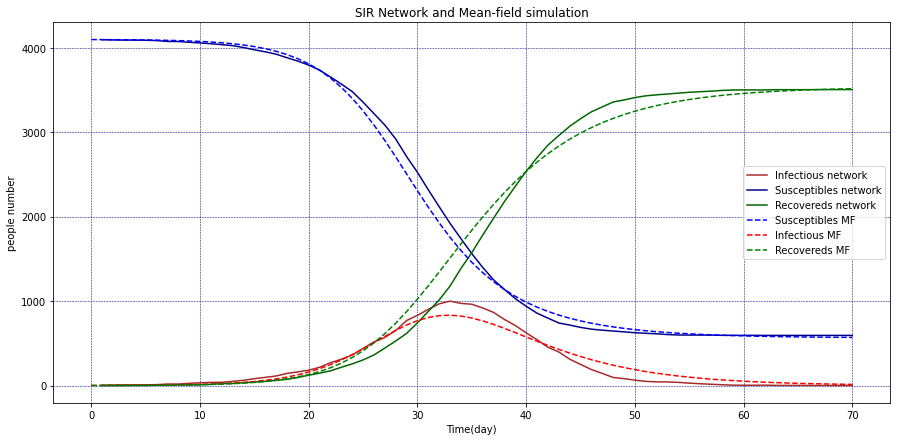

In [24]:
plt.figure(figsize=(15,7))
plt.rcParams.update({'font.size': 10})
plt.grid(color = 'navy', linestyle = '--', linewidth = 0.5)
plt.title('SIR Network and Mean-field simulation')
plt.plot(tdata,sdata, 'darkblue', label='Susceptibles network')
plt.plot(tdata,idata,'brown', label='Infectious network')
plt.plot(tdata,rdata, 'darkgreen', label='Recovereds network')
plt.legend(loc=0)
plt.xlabel('Time(day)')
plt.ylabel('people number')
plt.plot(RES[:,0], '--b', label='Susceptibles MFT')
plt.plot(RES[:,1], '--r', label='Infectious MFT')
plt.plot(RES[:,2], '--g', label='Recovereds MFT')
plt.legend(loc=0)
plt.xlabel('Time(day)')
plt.ylabel('people number')
plt.savefig('SIR simulation')
plt.show()